## Part 1:Rule Based NLP and Regex:

In [122]:
import re

def generate_bill(text):
    # Mapping of number words to their numerical equivalents
    number_map = {
        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
        'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10
    }

    # Updated regex pattern to match the provided format
    pattern = r'I bought (\w+) ([\w\s]+?) (\d+(?:,\d+)?) \$ each|(\w+) kilos of ([\w\s]+?) for (\d+(?:,\d+)?) dollar a kilogram|and (\w+) ([\w\s]+?) with (\d+(?:,\d+)?) dollar'

    # Find all matches in the text
    matches = re.findall(pattern, text)

    # Remove empty elements
    cleaned_data = [[item for item in row if item != ''] for row in matches]

    # Data structure to store the bill information
    bill = []

    # Process cleaned data
    for item in cleaned_data:
        quantity = number_map.get(item[0].lower(), 0) if item[0].lower() in number_map else 0
        product = item[1].strip()
        unit_price = float(item[2].replace(",", "."))
        

        # Append to bill
        bill.append({
            'Product': product,
            'Quantity': quantity,
            'Unit Price': unit_price,
            'Total Price': quantity * unit_price
        })

    # Display the bill
    print(f"{'Product':<20} {'Quantity':<10} {'Unit Price':<12} {'Total Price':<12}")
    for item in bill:
        print(f"{item['Product']:<20} {item['Quantity']:<10} {item['Unit Price']:>10.2f} {item['Total Price']:>12.2f}")

# Example use case
text = "I bought three Samsung smartphones 150 $ each, four kilos of fresh banana for 1,2 dollar a kilogram and one Hamburger with 4,5 dollar"
generate_bill(text)

Product              Quantity   Unit Price   Total Price 
Samsung smartphones  3              150.00       450.00
fresh banana         4                1.20         4.80
Hamburger            1                4.50         4.50


# Part 2: word Embedding :

#### Fetching Data from MongoDB database:

In [102]:
#Fetching Data from MongoDB database:
from pymongo import MongoClient
# Connection URI
uri = "mongodb://localhost:27017/"
# Connect to MongoDB
client = MongoClient(uri)
# Create or switch to the Arabic_NLP database
db = client["Arabic_NLP"]

# Define the collection. If it doesn't exist, it will be created as soon as a document is inserted.
articles = db.articles
documents = articles.find()

In [103]:
arabic_text = ""
for doc in documents:
    arabic_text += doc['articles_text']
print(arabic_text)

كثفت القوات الروسية الضغط على بلدة شاسيف يار الإستراتيجية في دونيتسك شرق أوكرانيا، بينما قال الرئيس الأوكراني فولوديمير زيلينسكي إن قواته عاجزة عن شن هجوم مضاد بسبب نقص الذخيرة مع تأخر وصول الدعم الغربي.
وقال مدونون عسكريون أوكرانيون وروس إن القوات الروسية وصلت إلى ضواحي البلدة التي تقع على مسافة 20 كيلومترا غرب مدينة باخموت التي سيطر عليها الجيش الروسي وقوات مجموعة فاغنر في مايو/أيار من العام الماضي بعد معارك طاحنة استمرت أشهرا.
بيد أن قائد الجيش الأوكراني أولكسندر سيرسكي قال السبت إن تشاسيف يار ما زالت تحت سيطرة القوات الأوكرانية، مضيفا أن كل محاولات الروس لاقتحامها باءت بالفشل.
وتابع سيرسكي أن البلدة تشهد واحدة من أعنف المعارك، حيث تحاول القوات الروسية كسر الدفاعات الأوكرانية.
من جهته، قال رئيس الإدارة المحلية في تشاسيف يار سيرغي تشاوس إن الأوضاع في البلدة باتت أكثر خطورة في الأسبوعين الأخيرين.
وفي حال سيطر الروس على مرتفعات تشاسيف يار، فسيتيح لهم ذلك استهداف مدينتي كراماتورسك وسلوفيانسك.
وأقامت القوات الأوكرانية تحصينات قوية في البلدة التي كان عدد سكانها قبل الحرب 13 ألفا ولم يبق ف

#### Establishing an NLP Pipeline for Text Cleaning, Tokenization, Stop words and Normalization:

In [67]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
# Text Cleaning
def clean_text(text):
    # Removing HTML tags, if any
    text = re.sub(r'<.*?>', '', text)
    # Removing punctuation and numbers, if desired
    text = re.sub(r'[^\w\s]', '', text)
    # Removing English letters and numbers
    text = re.sub(r'[a-zA-Z0-9]', '', text)
     # Removing new lines and carriage returns, replace them with a space
    text = re.sub(r'[\n\r]+', ' ', text)
    # Collapsing multiple spaces into a single space
    text = re.sub(r'\s+', ' ', text)
    return text.lower()
# Tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Removing Stop Words
# NLTK doesn't include Arabic stop words by default, so you might need to define your own list or find a resource online
arabic_stop_words = set(stopwords.words('arabic'))  # Assuming 'arabic' stop words list is available or manually defined

def remove_stop_words(tokens):
    filtered_tokens = [word for word in tokens if word not in arabic_stop_words]
    return filtered_tokens

# Example of a Normalization step (simple case folding for Arabic might not be applicable, but as an example)
def normalize_text(tokens):
    normalized_tokens = [word.lower() for word in tokens]  # Lowercasing might not be applicable for Arabic
    return normalized_tokens

In [68]:
# Applying the Pipeline
cleaned_text = clean_text(arabic_text)
tokens = tokenize_text(cleaned_text)
tokens_without_stopwords = remove_stop_words(tokens)
normalized_tokens = normalize_text(tokens_without_stopwords)

In [70]:
print(normalized_tokens)

['كثفت', 'القوات', 'الروسية', 'الضغط', 'بلدة', 'شاسيف', 'يار', 'الإستراتيجية', 'دونيتسك', 'شرق', 'أوكرانيا', 'بينما', 'قال', 'الرئيس', 'الأوكراني', 'فولوديمير', 'زيلينسكي', 'قواته', 'عاجزة', 'شن', 'هجوم', 'مضاد', 'بسبب', 'نقص', 'الذخيرة', 'تأخر', 'وصول', 'الدعم', 'الغربي', 'وقال', 'مدونون', 'عسكريون', 'أوكرانيون', 'وروس', 'القوات', 'الروسية', 'وصلت', 'ضواحي', 'البلدة', 'تقع', 'مسافة', 'كيلومترا', 'غرب', 'مدينة', 'باخموت', 'سيطر', 'عليها', 'الجيش', 'الروسي', 'وقوات', 'مجموعة', 'فاغنر', 'مايوأيار', 'العام', 'الماضي', 'معارك', 'طاحنة', 'استمرت', 'أشهرا', 'قائد', 'الجيش', 'الأوكراني', 'أولكسندر', 'سيرسكي', 'قال', 'السبت', 'تشاسيف', 'يار', 'زالت', 'سيطرة', 'القوات', 'الأوكرانية', 'مضيفا', 'محاولات', 'الروس', 'لاقتحامها', 'باءت', 'بالفشل', 'وتابع', 'سيرسكي', 'البلدة', 'تشهد', 'واحدة', 'أعنف', 'المعارك', 'تحاول', 'القوات', 'الروسية', 'كسر', 'الدفاعات', 'الأوكرانية', 'جهته', 'قال', 'رئيس', 'الإدارة', 'المحلية', 'تشاسيف', 'يار', 'سيرغي', 'تشاوس', 'الأوضاع', 'البلدة', 'باتت', 'خطورة', 'الأسبوعين

### 1. Applying one hot encoding, bag of words, TF-IDF technics on the Data vectors collected:

#### One-Hot Encoding:

In [93]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create vocabulary
vocabulary = sorted(set(normalized_tokens))

# Transform text data to one-hot encoding
encoder = OneHotEncoder(categories=[vocabulary], sparse=False)
one_hot_encoded = encoder.fit_transform(np.array(arabic_text).reshape(-1, 1))

# Create DataFrame
df_one_hot = pd.DataFrame(one_hot_encoded, columns=vocabulary)
df_one_hot

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,آخرون,آلة,آند,أبوابها,أتحمل,أثرا,أحرزت,أخرى,أدوات,أدى,...,يكون,يمتد,يمكن,يهدف,يوسي,يوظفهم,يوفر,يوم,يومه,يونيوحزيران
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Bag of Words:

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

# Transform text data to bag of words representation
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(normalized_tokens)

# Create DataFrame
df_bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
df_bag_of_words

,آخرون,آلة,آند,أبوابها,أتحمل,أثرا,أحرزت,أخرى,أدوات,أدى,...,يكون,يمتد,يمكن,يهدف,يوسي,يوظفهم,يوفر,يوم,يومه,يونيوحزيران
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF (Term Frequency-Inverse Document Frequency):

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transform text data to TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_representation = tfidf_vectorizer.fit_transform(normalized_tokens)

# Create DataFrame
df_tfidf = pd.DataFrame(tfidf_representation.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf

,آخرون,آلة,آند,أبوابها,أتحمل,أثرا,أحرزت,أخرى,أدوات,أدى,...,يكون,يمتد,يمكن,يهدف,يوسي,يوظفهم,يوفر,يوم,يومه,يونيوحزيران
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2 Applying one Word2Vec Approach (Skip Gram, CBOW) on the same DataSet:

In [117]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt') 
from nltk.tokenize import word_tokenize


# Tokenize the text into words
tokens = word_tokenize(arabic_text)

# Apply Word2Vec with Skip Gram
model_sg = Word2Vec(sentences=[tokens], vector_size=100, window=5, sg=1, min_count=1)

# Apply Word2Vec with CBOW
model_cbow = Word2Vec(sentences=[tokens], vector_size=100, window=5, sg=0, min_count=1)

# evaluatIion
print("Similar words using Skip Gram:")
similar_words_sg = model_sg.wv.most_similar("القوات")
print(similar_words_sg)

print("\nSimilar words using CBOW:")
similar_words_cbow = model_cbow.wv.most_similar("القوات")
print(similar_words_cbow)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Similar words using Skip Gram:
[('في', 0.448354572057724), ('كان', 0.40957707166671753), ('إلى', 0.39883092045783997), ('الجيش', 0.38136136531829834), ('المخابرات', 0.3798147141933441), ('.', 0.37680819630622864), ('الاصطناعي', 0.3755412697792053), ('سارييل', 0.3708045482635498), ('عن', 0.36929890513420105), ('الإسرائيلي', 0.36909571290016174)]

Similar words using CBOW:
[('للمملكة', 0.3345445394515991), ('الأمير', 0.26265886425971985), ('إنه', 0.2616996765136719), ('أشار', 0.2594548463821411), ('أثرا', 0.2572757601737976), ('كلما', 0.2529412806034088), ('نشر', 0.2451259344816208), ('بها،', 0.2372777909040451), ('لأحد', 0.2369164377450943), ('قليلة،', 0.23449234664440155)]


#### Poting Skip Gram, CBOW approaches result using Tsne Algorithm:

C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


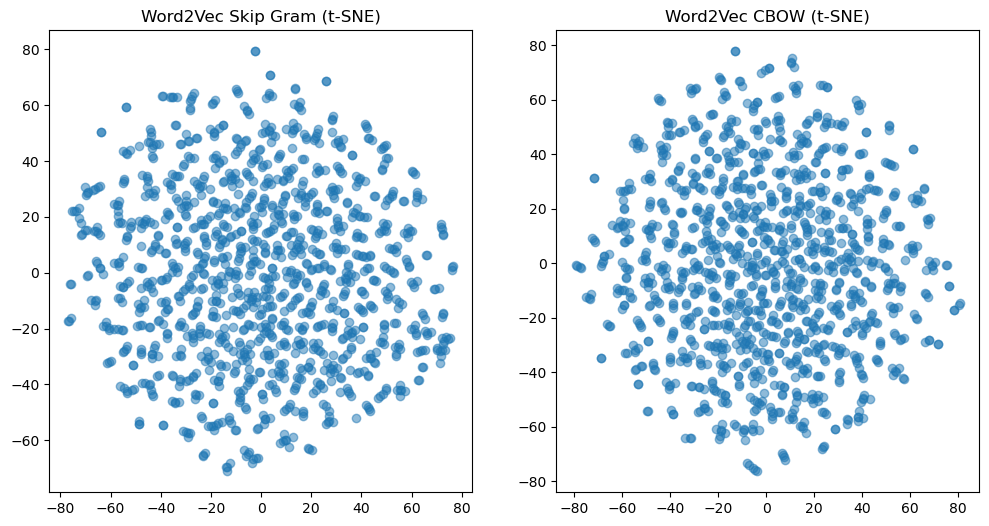

In [119]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Get all word vectors
word_vectors_sg = model_sg.wv[model_sg.wv.key_to_index]
word_vectors_cbow = model_cbow.wv[model_cbow.wv.key_to_index]


# Reduce dimensionality to 2D for plotting using t-SNE
tsne = TSNE(n_components=2, perplexity=5)  # Adjust perplexity as needed
tsne_result_sg = tsne.fit_transform(word_vectors_sg)
tsne_result_cbow = tsne.fit_transform(word_vectors_cbow)

# Plot using t-SNE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(tsne_result_sg[:, 0], tsne_result_sg[:, 1], alpha=0.5)
plt.title('Word2Vec Skip Gram (t-SNE)')
plt.subplot(1, 2, 2)
plt.scatter(tsne_result_cbow[:, 0], tsne_result_cbow[:, 1], alpha=0.5)
plt.title('Word2Vec CBOW (t-SNE)')
plt.show()

### 3. Applying Glove and FastText approaches on the same DataSet:

In [120]:
from gensim.models import Word2Vec, FastText
from gensim.models.word2vec import LineSentence
import regex as re

# Function to tokenize Arabic text
def tokenize(text):
    pattern = re.compile(r'[ء-ي]+')
    return pattern.findall(text.lower())

# Tokenize the text
tokens = tokenize(arabic_text)

# Save the tokens to a text file
with open("arabic_text.txt", "w", encoding="utf-8") as f:
    for token in tokens:
        f.write(token + "\n")

# Train GloVe embeddings
glove_model = Word2Vec(LineSentence("arabic_text.txt"), vector_size=100, window=5, min_count=1, sg=0)

# Train FastText embeddings
fasttext_model = FastText(LineSentence("arabic_text.txt"), vector_size=100, window=5, min_count=1, sg=1)

# Test the models
print("GloVe:", glove_model.wv.most_similar("القوات"))
print("FastText:", fasttext_model.wv.most_similar("القوات"))

GloVe: [('زمت', 0.33606940507888794), ('بساحة', 0.2583531439304352), ('العميد', 0.25762054324150085), ('بوصفها', 0.257106214761734), ('خلال', 0.25570768117904663), ('وملفات', 0.25146013498306274), ('تعمل', 0.24041804671287537), ('مرتفعات', 0.23762793838977814), ('والأشخاص', 0.23566779494285583), ('الزمن', 0.2331649363040924)]
FastText: [('للقوات', 0.5130104422569275), ('القومي', 0.4039005637168884), ('الثغرة', 0.39033493399620056), ('الأوكراني', 0.370819628238678), ('بأوكرانيا', 0.36985623836517334), ('وقوات', 0.36910390853881836), ('أوكرانيا', 0.3434632420539856), ('الذكاء', 0.32308194041252136), ('سنوات', 0.32239311933517456), ('الأوكرانية', 0.3189042806625366)]


#### Poting Glove and FastText approaches result using Tsne Algorithm:

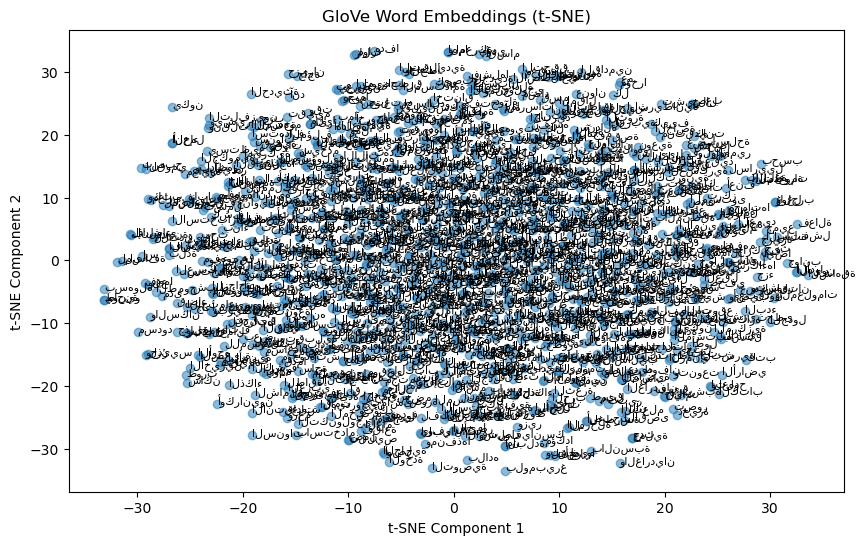

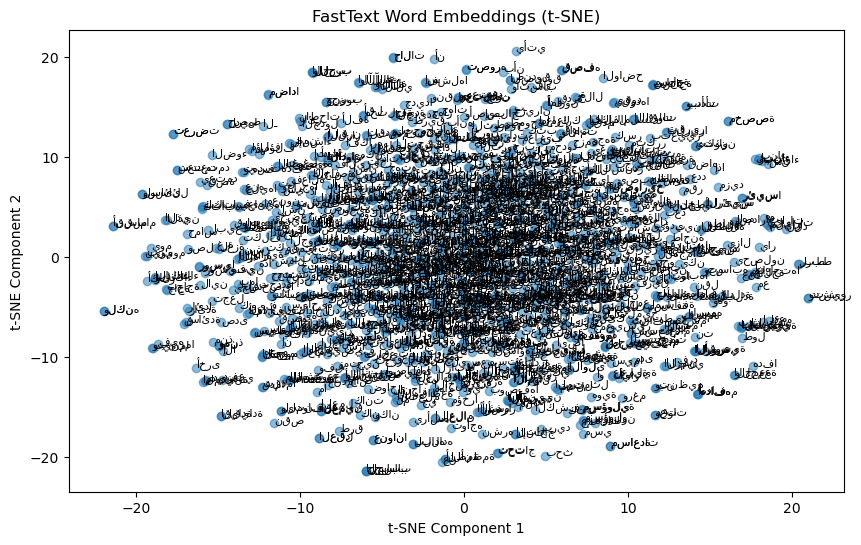

In [121]:
# Function to plot word embeddings using t-SNE with reduced perplexity
def plot_embeddings_tsne(model, title, perplexity=30):
    # Extract vectors and corresponding words
    word_vectors = model.wv
    words = list(word_vectors.index_to_key)
    vectors = word_vectors.vectors

    # Reduce dimensionality to 2D using t-SNE with reduced perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    embeddings_2d = tsne.fit_transform(vectors)

    # Plot the embeddings
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
    for word, (x, y) in zip(words, embeddings_2d):
        plt.text(x, y, word, fontsize=8)
    plt.title(title)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()

# Plot GloVe embeddings using t-SNE with reduced perplexity
plot_embeddings_tsne(glove_model, "GloVe Word Embeddings (t-SNE)")

# Plot FastText embeddings using t-SNE with reduced perplexity
plot_embeddings_tsne(fasttext_model, "FastText Word Embeddings (t-SNE)")

### Conclusion:

In this lab, I delved into the realm of word embeddings, a cornerstone in natural language processing (NLP), through the exploration of 4 prominent algorithms: Skip Gram, CBOW, GloVe and FastText. Our journey commenced with rigorous data preprocessing, encompassing tokenization, lowercase conversion, and special character removal, to ensure the preparedness of our text data for embedding training. Subsequently, we traversed the terrain of training word embedding models, witnessing the transformation of words into distributed representations within continuous vector spaces. The visualization of these learned embeddings using t-SNE (t-distributed Stochastic Neighbor Embedding) unveiled fascinating spatial relationships between words, illuminating the semantic connections encoded within the embedding space.